In [1]:
import pandas as pd

import numpy as np
df=pd.read_csv('dirty_cafe_sales.csv')
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2,4,Credit Card,Takeaway,9/8/2023
1,TXN_4977031,Cake,4,3,12,Cash,In-store,5/16/2023
2,TXN_4271903,Cookie,4,1,ERROR,Credit Card,In-store,7/19/2023
3,TXN_7034554,Salad,2,5,10,UNKNOWN,UNKNOWN,4/27/2023
4,TXN_3160411,Coffee,2,2,4,Digital Wallet,In-store,6/11/2023
...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2,2,4,NaN,UNKNOWN,8/30/2023
9996,TXN_9659401,NaN,3,NaN,3,Digital Wallet,NaN,6/2/2023
9997,TXN_5255387,Coffee,4,2,8,Digital Wallet,NaN,3/2/2023
9998,TXN_7695629,Cookie,3,NaN,3,Digital Wallet,NaN,12/2/2023


In [2]:
print("Value counts for 'Payment Method':")
df['Payment Method'].value_counts(dropna=False)



Value counts for 'Payment Method':


Payment Method
NaN               2579
Digital Wallet    2291
Credit Card       2273
Cash              2258
ERROR              306
UNKNOWN            293
Name: count, dtype: int64

In [4]:
print("\nValue counts for 'Location':")
df['Location'].value_counts(dropna=False)



Value counts for 'Location':


Location
NaN         3265
Takeaway    3022
In-store    3017
ERROR        358
UNKNOWN      338
Name: count, dtype: int64

In [5]:
# As 'UNKNOWN' is already a category in both columns, I will fill the missing `NaN` values with 'UNKNOWN' to maintain consistency in the dataset.
df['Payment Method'] = df['Payment Method'].fillna('UNKNOWN')
df['Location'] = df['Location'].fillna('UNKNOWN')

In [6]:
# Verify that missing values have been filled
print("Missing values after imputation:")
df[['Payment Method', 'Location']].isnull().sum()


Missing values after imputation:


Payment Method    0
Location          0
dtype: int64

In [8]:
# similarly we can fill the missing values 
print("Value counts for 'Item':")
df['Item'].value_counts(dropna=False)


Value counts for 'Item':


Item
Juice       1171
Coffee      1165
Salad       1148
Cake        1139
Sandwich    1131
Smoothie    1096
Cookie      1092
Tea         1089
UNKNOWN      344
NaN          333
ERROR        292
Name: count, dtype: int64

In [9]:
print("\nValue counts for 'Quantity':")
df['Quantity'].value_counts(dropna=False)


Value counts for 'Quantity':


Quantity
5          2013
2          1974
4          1863
3          1849
1          1822
UNKNOWN     171
ERROR       170
NaN         138
Name: count, dtype: int64

In [10]:
# Fill missing values in 'Item' column
# Fill NaN values with 'UNKNOWN'.
df['Item'] = df['Item'].fillna('UNKNOWN')

In [11]:
print("Value counts for 'Item' after imputation:")
df['Item'].value_counts(dropna=False)


Value counts for 'Item' after imputation:


Item
Juice       1171
Coffee      1165
Salad       1148
Cake        1139
Sandwich    1131
Smoothie    1096
Cookie      1092
Tea         1089
UNKNOWN      677
ERROR        292
Name: count, dtype: int64

In [ ]:
# Clean and fill missing values in 'Price Per Unit' column
#  Replace 'UNKNOWN' and 'ERROR' with NaN
df['Price Per Unit'] = df['Price Per Unit'].replace({'UNKNOWN': np.nan, 'ERROR': np.nan})

In [13]:
# Convert 'Price Per Unit' to numeric, coercing errors to NaN
df['Price Per Unit'] = pd.to_numeric(df['Price Per Unit'], errors='coerce')



In [14]:
# Calculate the mode for imputation
price_per_unit_mode = df['Price Per Unit'].mode()[0]



In [15]:
# Fill NaN values with the mode
df['Price Per Unit'] = df['Price Per Unit'].fillna(price_per_unit_mode)

print("Value counts for 'Price Per Unit' after imputation:")
df['Price Per Unit'].value_counts(dropna=False)



Value counts for 'Price Per Unit' after imputation:


Price Per Unit
3.0    2962
4.0    2331
2.0    1227
5.0    1204
1.0    1143
1.5    1133
Name: count, dtype: int64

In [17]:
print("Missing values for 'Price Per Unit' after imputation:")
df['Price Per Unit'].isnull().sum()

Missing values for 'Price Per Unit' after imputation:


np.int64(0)

In [18]:
print("Value counts for 'Price Per Unit':")
df['Price Per Unit'].value_counts(dropna=False)



Value counts for 'Price Per Unit':


Price Per Unit
3.0    2962
4.0    2331
2.0    1227
5.0    1204
1.0    1143
1.5    1133
Name: count, dtype: int64

In [19]:
print("\nData type of 'Price Per Unit':")
df['Price Per Unit'].dtype



Data type of 'Price Per Unit':


dtype('float64')

In [20]:
# Clean and fill missing values in 'Quantity' column
# Replace 'UNKNOWN' and 'ERROR' with NaN
df['Quantity'] = df['Quantity'].replace({'UNKNOWN': np.nan, 'ERROR': np.nan})



In [21]:
# Convert 'Quantity' to numeric, coercing errors to NaN
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')


In [22]:

# Calculate the mode for imputation
quantity_mode = df['Quantity'].mode()[0]



In [23]:
# Fill NaN values with the mode
df['Quantity'] = df['Quantity'].fillna(quantity_mode)

print("Value counts for 'Quantity' after imputation:")
df['Quantity'].value_counts(dropna=False)

print("Missing values for 'Item' and 'Quantity' after imputation:")
df[['Item', 'Quantity']].isnull().sum()



Value counts for 'Quantity' after imputation:
Missing values for 'Item' and 'Quantity' after imputation:


Item        0
Quantity    0
dtype: int64

In [24]:
# Clean and fill missing values in 'Total Spent' column
#First, convert non-numeric string values ('UNKNOWN', 'ERROR') and current NaN values to numerical NaN
# Then, where possible, recalculate 'Total Spent' using 'Quantity' and 'Price Per Unit'
# Finally, impute any remaining NaN values with the mode of the column
# Replace 'UNKNOWN' and 'ERROR' with NaN, and convert to numeric
df['Total Spent'] = df['Total Spent'].replace({'UNKNOWN': np.nan, 'ERROR': np.nan})
df['Total Spent'] = pd.to_numeric(df['Total Spent'], errors='coerce')



In [25]:
# Recalculate 'Total Spent' where it's NaN and Quantity/Price Per Unit are available
recalculated_total_spent = df['Quantity'] * df['Price Per Unit']
mask = df['Total Spent'].isnull()
df.loc[mask, 'Total Spent'] = recalculated_total_spent.loc[mask]



In [26]:
# Calculate the mode for imputation for any remaining NaN values
total_spent_mode = df['Total Spent'].mode()[0]



In [27]:
# Fill remaining NaN values with the mode
df['Total Spent'] = df['Total Spent'].fillna(total_spent_mode)

print("Value counts for 'Total Spent' after imputation:")
df['Total Spent'].value_counts(dropna=False)

print("Missing values for 'Total Spent' after imputation:")
df['Total Spent'].isnull().sum()

print("Value counts for 'Total Spent':")
df['Total Spent'].value_counts(dropna=False)

print("\nData type of 'Total Spent':")
df['Total Spent'].dtype



Value counts for 'Total Spent' after imputation:
Missing values for 'Total Spent' after imputation:
Value counts for 'Total Spent':

Data type of 'Total Spent':


dtype('float64')

In [28]:
# Clean and fill missing values in 'Transaction Date' column
# Replace 'UNKNOWN' and 'ERROR' with NaN
df['Transaction Date'] = df['Transaction Date'].replace({'UNKNOWN': np.nan, 'ERROR': np.nan})



In [30]:
# Convert 'Transaction Date' to datetime, coercing errors to NaN
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')

# Calculate the mode for imputation
transaction_date_mode = df['Transaction Date'].mode()[0]

In [31]:
# Fill NaN values with the mode
df['Transaction Date'] = df['Transaction Date'].fillna(transaction_date_mode)

print("Value counts for 'Transaction Date' after imputation:")
df['Transaction Date'].value_counts(dropna=False)

print("Missing values for 'Transaction Date' after imputation:")
df['Transaction Date'].isnull().sum()

print("Value counts for 'Transaction Date':")
df['Transaction Date'].value_counts(dropna=False)

print("\nData type of 'Transaction Date':")
df['Transaction Date'].dtype

Value counts for 'Transaction Date' after imputation:
Missing values for 'Transaction Date' after imputation:
Value counts for 'Transaction Date':

Data type of 'Transaction Date':


dtype('<M8[us]')

In [32]:
# After all cleaning steps, let's check the final state of the DataFrame
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    10000 non-null  str           
 1   Item              10000 non-null  str           
 2   Quantity          10000 non-null  float64       
 3   Price Per Unit    10000 non-null  float64       
 4   Total Spent       10000 non-null  float64       
 5   Payment Method    10000 non-null  str           
 6   Location          10000 non-null  str           
 7   Transaction Date  10000 non-null  datetime64[us]
dtypes: datetime64[us](1), float64(3), str(4)
memory usage: 947.4 KB


In [33]:
# After all cleaning steps, we can save the cleaned DataFrame to a new CSV file
df.to_csv('cleaned_cafe_sales.csv', index=False)
print("Cleaned DataFrame saved to 'cleaned_cafe_sales.csv'")

Cleaned DataFrame saved to 'cleaned_cafe_sales.csv'


In [34]:
# Load the cleaned CSV file into a new DataFrame
cleaned_df = pd.read_csv('cleaned_cafe_sales.csv')



In [35]:
# Display the first 5 rows of the new DataFrame
print("First 5 rows of the loaded 'cleaned_cafe_sales.csv':")
cleaned_df.head()

First 5 rows of the loaded 'cleaned_cafe_sales.csv':


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11


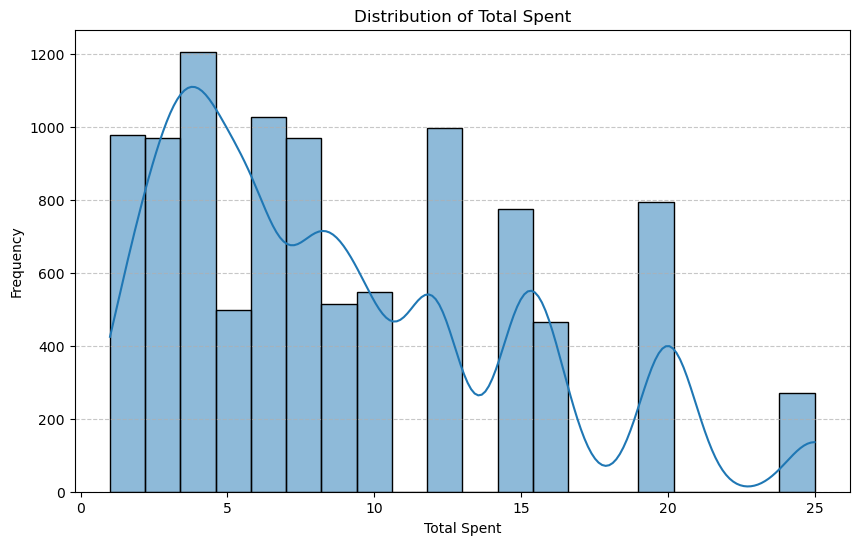

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(cleaned_df['Total Spent'], bins=20, kde=True)
plt.title('Distribution of Total Spent')
plt.xlabel('Total Spent')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()